In [1]:
words = open("names.txt", 'r').read().splitlines()

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {c: i for i,c in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [99]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline



In [129]:
block_size = 3
X, Y = [], []

for w in words:
    # print(w)
    context = [0] * block_size
    for ch, in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [130]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [147]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [148]:
sum(p.nelement() for p in parameters)

3481

In [149]:
for p in parameters:
    p.requires_grad = True

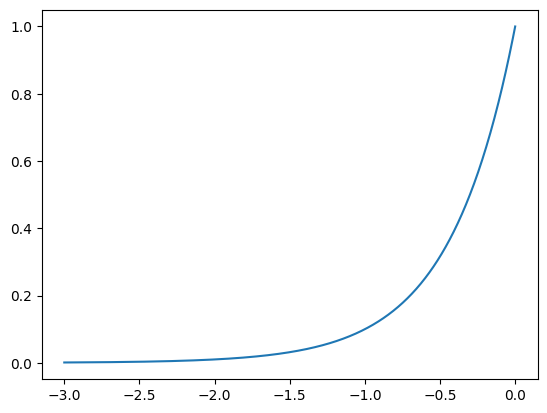

In [153]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
plt.plot(lre, lrs)

In [151]:
lri = []
lossi = []
# train
for i in range(1000):
    # forward pass
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    lr = lrs[i]
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -lr * p.grad
    lri.append(lre[i])
    lossi.append(loss.item())

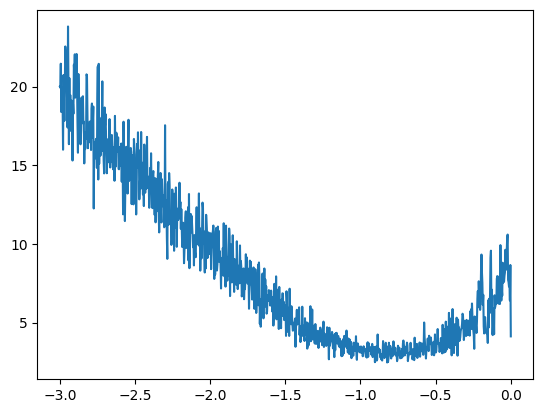

In [152]:
plt.plot(lri, lossi);